100%|██████████| 5/5 [01:09<00:00, 13.87s/it]


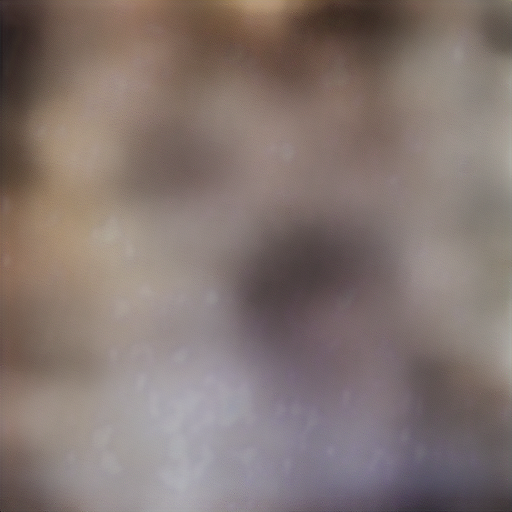

In [1]:
import model_loader
import pipeline
from PIL import Image
from transformers import CLIPTokenizer
import torch

DEVICE = "cpu"

ALLOW_CUDA = False
ALLOW_MPS = False

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif torch.has_mps or torch.backend.mps.is_available() and ALLOW_MPS:
    DEVICE = "mps"


tokenizer = CLIPTokenizer("../data/vocab.json", merges_file = "../data/merges.txt")
model_file = "../data/v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT to IMAGE

prompt = "A cat streching on the floor, highly detailed, ultra sharp, cinematic, 8K resolution"
uncond_prompt = "" # can be a negative prompt
do_cfg = True
cfg_scale = 7

## IMAGE TO IMAGE

input_image = None
image_path = "../image/dog.jpg"
# input_image = Image.open(image_path)
strength = 0.9


sampler = "ddpm"
num_inference_steps = 50
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    models=models,
    seed=seed,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer

)

Image.fromarray(output_image)